In [1]:
import frgtools.uvvis as uvvis
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import frgtools.misc as fm
import frgtools.plotting as fplt
from matplotlib.lines import Line2D
from scipy.stats import linregress
import os

%load_ext blackcellmagic

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)

# UV Vis

In [2]:
uvdata = uvvis.load_lambda(
    "/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/UV_VIS_MRC/20210805_T23"
)  # os.path.join('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/UV_VIS_MRC/20201204 EuCsPbBr3 from APS, Deniz A-F Cl-I-Br sweep', '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/UV_VIS_MRC/20201204 EuCsPbBr3 from APS, Deniz A-F Cl-I-Br sweep/T+R Data'))
uvkeys = list(uvdata.keys())
wl = uvdata[uvkeys[0]]["wavelength"]

for i, k in enumerate(uvdata):
    print(f"{i}: {k}")

0: 15_R
1: 15_T
2: 12_R
3: 12_T
4: Glass_T
5: Glass_R
6: 4_R
7: 9_T
8: 4_T
9: 9_R


In [7]:
uvdata;

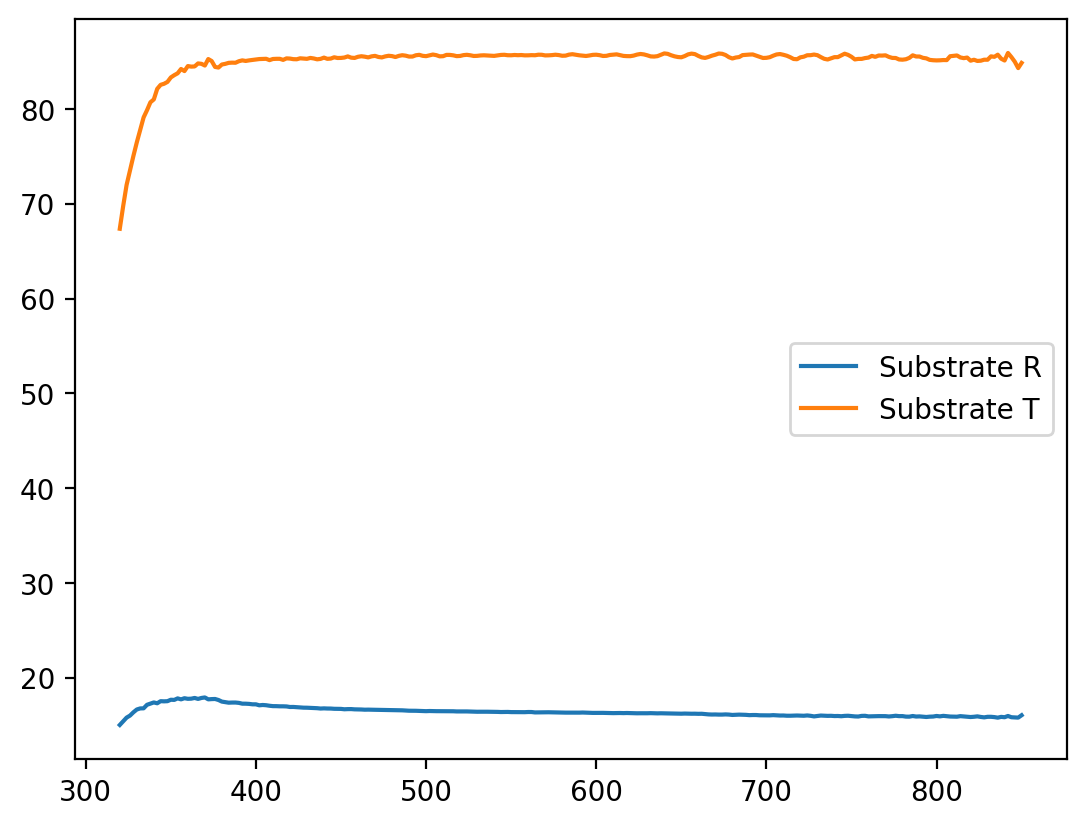

In [9]:
rsub = uvdata["Glass_R"]["signal"]
tsub = uvdata["Glass_T"]["signal"]

plt.plot(wl, rsub, label="Substrate R")
plt.plot(wl, tsub, label="Substrate T")
plt.legend()
plt.show()

In [10]:
def calc_abs(rdata, tdata):
    keys = list(uvdata.keys())
    wl = rdata["wavelength"]
    #     r = np.power(10, -1/rdata['signal'])
    #     t = np.power(10, -tdata['signal'])

    r = rdata["signal"]
    t = tdata["signal"]

    t /= tsub
    r /= rsub
    a = -np.log((t + r / 100))
    #     a = tdata['signal'] + rdata['signal']
    return a

In [11]:
a = {}
for s in ["15", "12", "9", "4"]:
    rdata = uvdata[f"{s}_R"]
    tdata = uvdata[f"{s}_T"]
    a[s] = calc_abs(rdata, tdata)

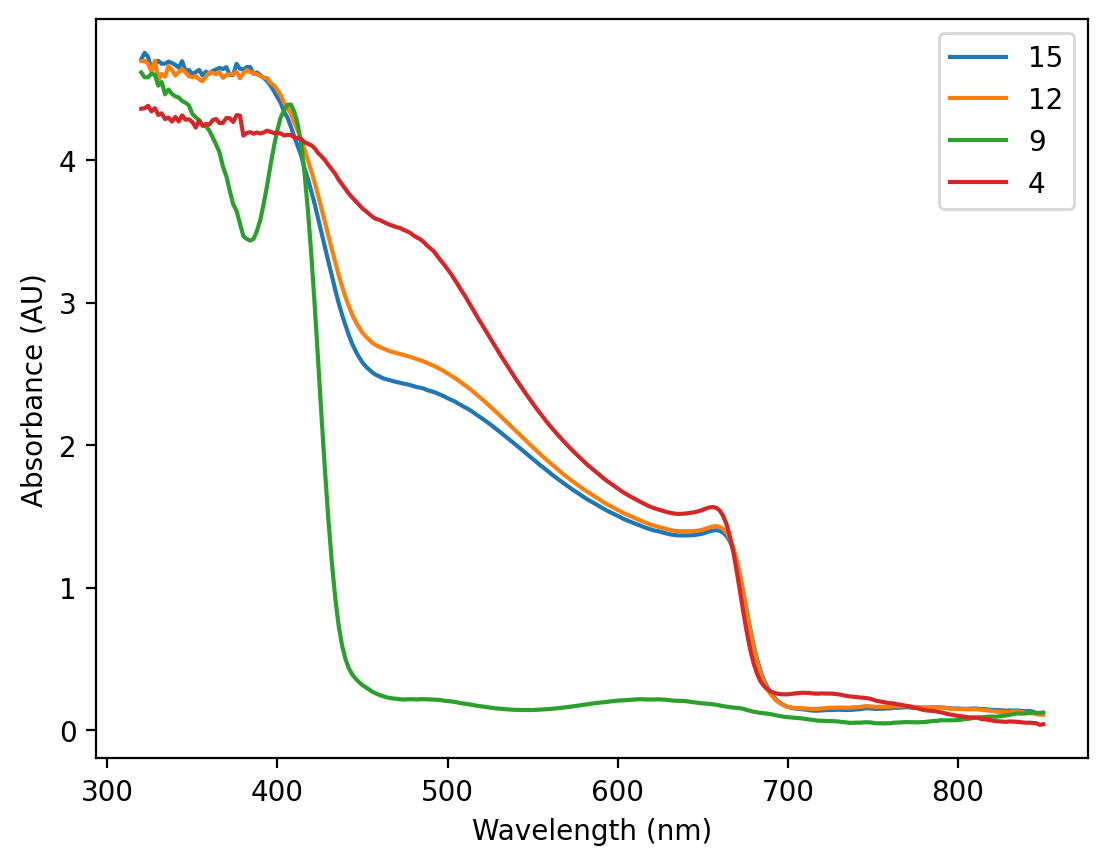

In [12]:
fig, ax = plt.subplots()
for s, a_ in a.items():
    ax.plot(wl, a_, label=s)

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (AU)")
plt.show()
# plt.savefig('Absorbance Plots')

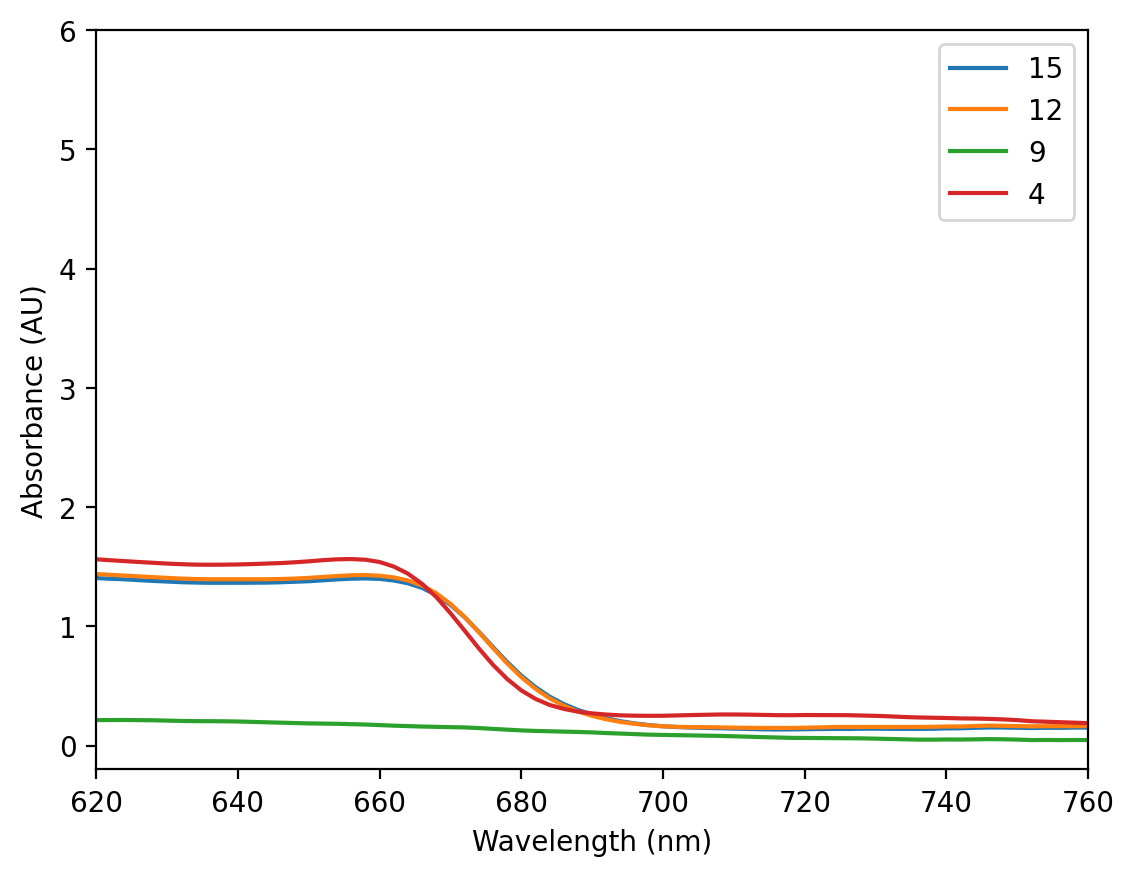

In [13]:
fig, ax = plt.subplots()
for s, a_ in a.items():
    ax.plot(wl, a_, label = s)
    
plt.legend()
plt.xlim(620, 760)
plt.ylim(ymax = 6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.show()
# plt.savefig('Absorbance Plots Zoomed')

## Tauc Analysis

In [15]:
wlmin = 650
wlidx = np.argmin(wl>wlmin)

In [31]:
# uvvis.tauc(       )

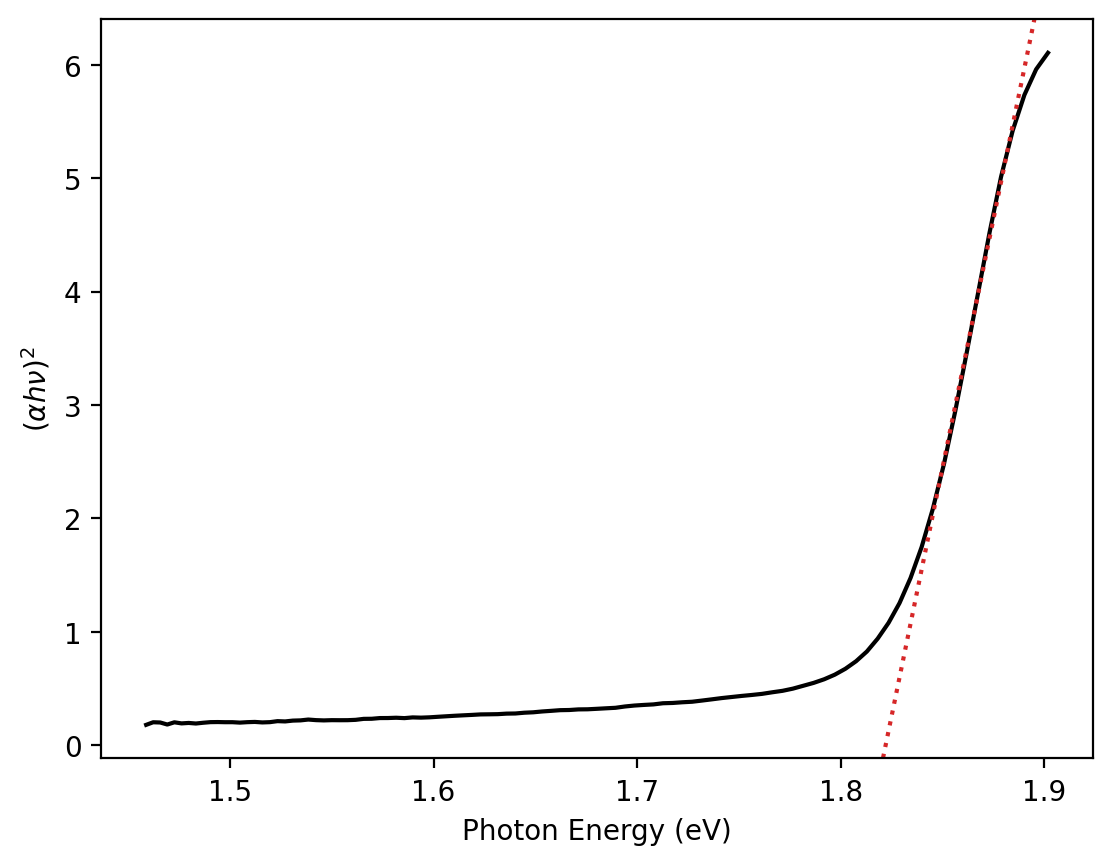

{'bandgap': 1.8220783665976157,
 'r2': 0.9986253548279937,
 'bandgap_min': 1.8116763985359245,
 'bandgap_max': 1.8340796519763798}

In [32]:
uvvis.tauc(wl[:wlidx], a['A'][:wlidx], bandgap_type='direct', fit_width = 9, plot = True, verbose = True)

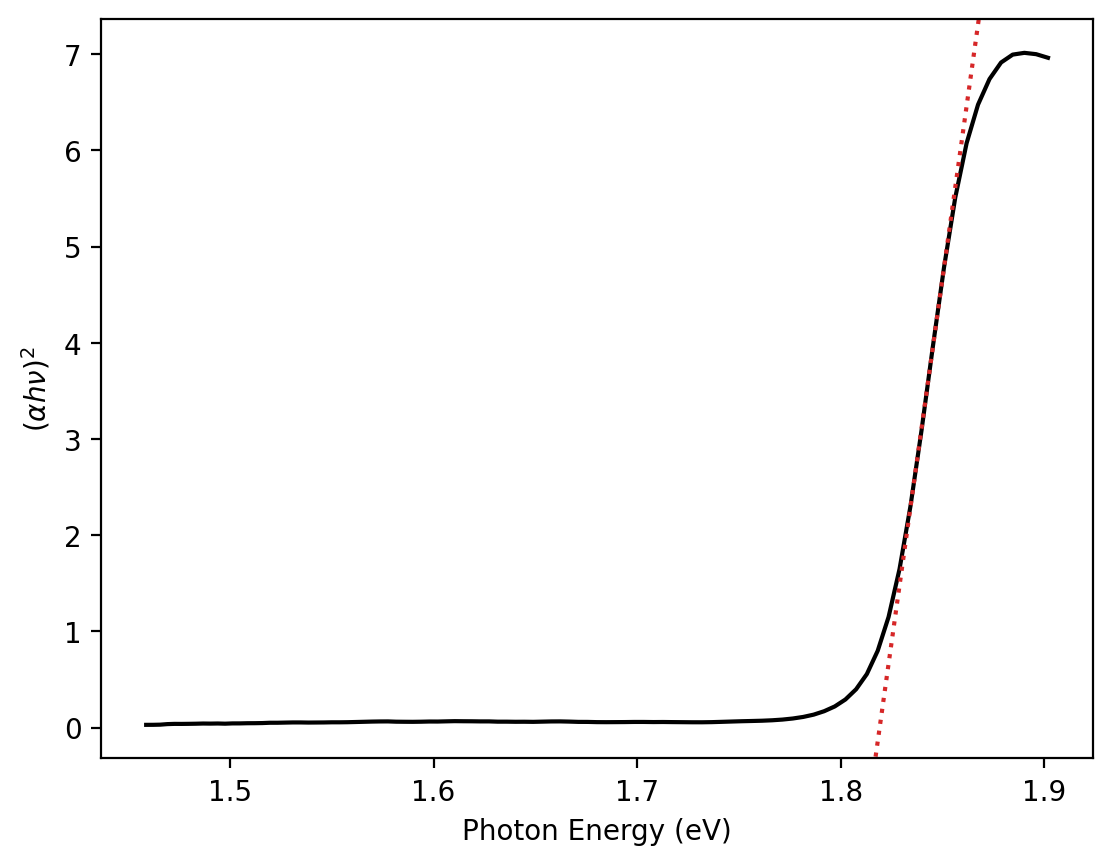

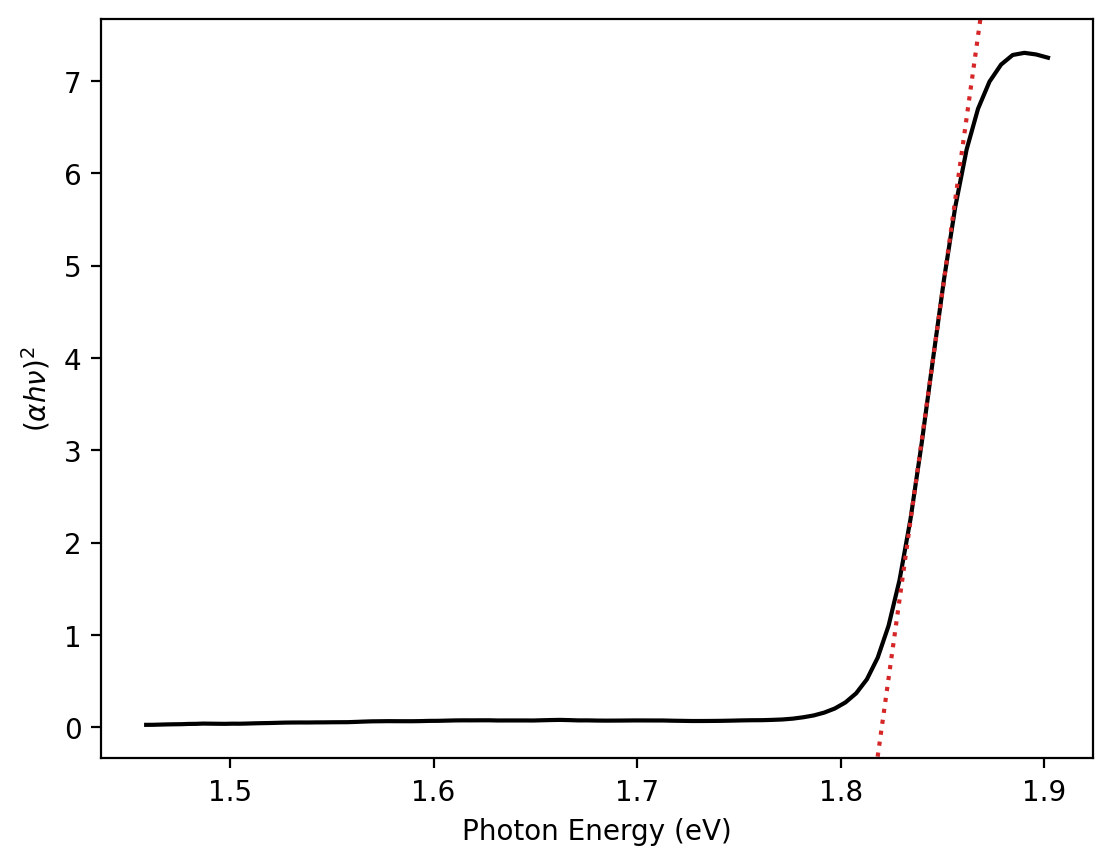

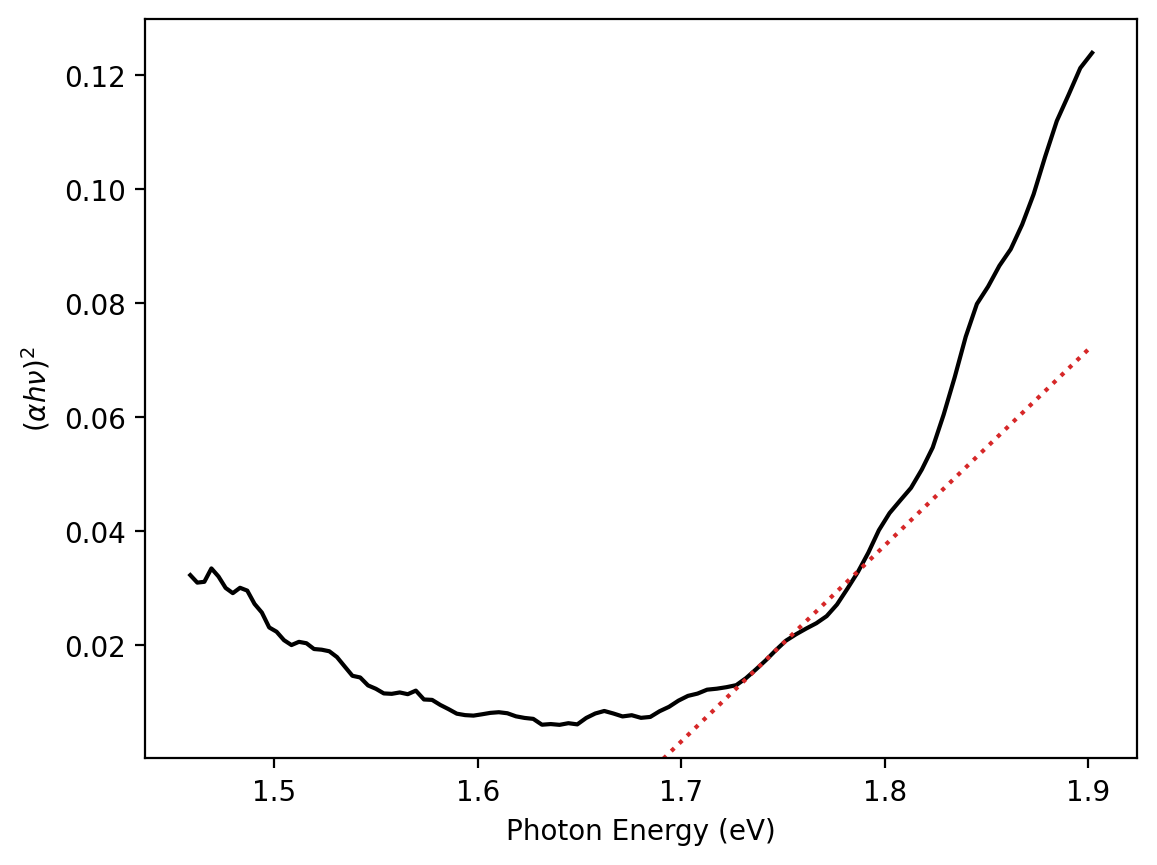

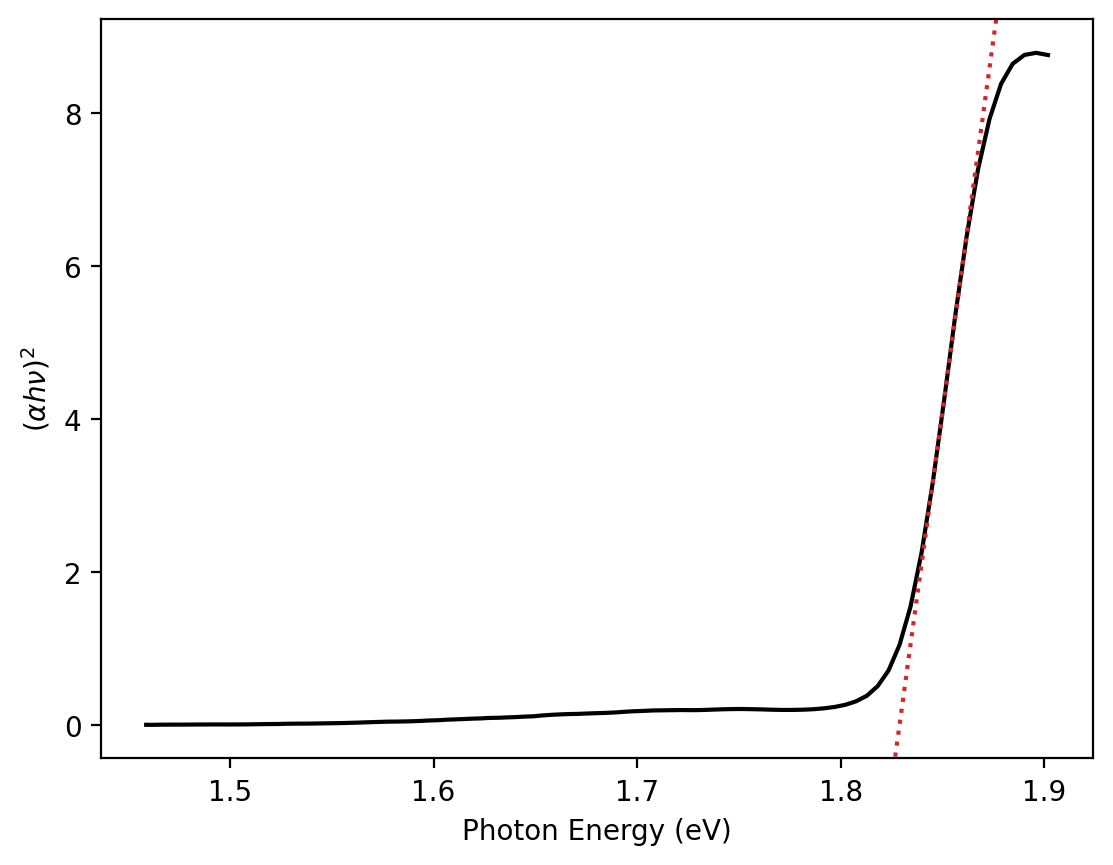

In [16]:
eg = {}
for s, a_ in a.items():
    eg[s] = uvvis.tauc(wl[:wlidx], a[s][:wlidx], bandgap_type='direct', fit_width = 5, plot = True, verbose = True)

In [30]:
import pandas as pd

dfData = {
    'sample':[],
    'wl':[],
    'a':[],
    'bandgap':[]
}

for s in a.keys():
    dfData['sample'].append(s)
    dfData['wl'].append(wl)
    dfData['a'].append(a[s])
    dfData['bandgap'].append(eg[s])
    
df = pd.DataFrame(dfData)
# df.to_csv('20201203 Deniz Inorganics w I-Cl-Br.csv', index = False)

In [31]:
df['bandgap']

0    {'bandgap': 1.8191474197793087, 'r2': 0.999806...
1    {'bandgap': 1.8201920436735308, 'r2': 0.999671...
2    {'bandgap': 1.6911901427307812, 'r2': 0.999741...
3    {'bandgap': 1.8288987272879818, 'r2': 0.999719...
Name: bandgap, dtype: object

In [32]:
df

,sample,wl,a,bandgap
0,15,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.11601333907774088, 0.11635478342305136, 0.1...","{'bandgap': 1.8191474197793087, 'r2': 0.999806..."
1,12,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.10763556439087363, 0.10839438675533865, 0.1...","{'bandgap': 1.8201920436735308, 'r2': 0.999671..."
2,9,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.12300141191298022, 0.12017884405643507, 0.1...","{'bandgap': 1.6911901427307812, 'r2': 0.999741..."
3,4,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.04067436635384505, 0.03662561277731524, 0.0...","{'bandgap': 1.8288987272879818, 'r2': 0.999719..."


In [33]:
name_key = {
    '15': '15% Excess PbI2',
    '12': '12% Excess PbI2',
    '9': '9% Excess PbI2',
    '4': '4% Excess PbI2',
#     '1': 'Peak_PL',
#     '2': 'Overanneal',
}

In [35]:
def getname(n):
    letter = n
    return name_key[letter]

def getname_2(n):
    letter_2 = n[1]
    return name_key[letter_2]

df['label'] = df['sample'].apply(getname)
# df['condition'] = df['sample'].apply(getname_2)

In [36]:
df

,sample,wl,a,bandgap,label
0,15,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.11601333907774088, 0.11635478342305136, 0.1...","{'bandgap': 1.8191474197793087, 'r2': 0.999806...",15% Excess PbI2
1,12,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.10763556439087363, 0.10839438675533865, 0.1...","{'bandgap': 1.8201920436735308, 'r2': 0.999671...",12% Excess PbI2
2,9,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.12300141191298022, 0.12017884405643507, 0.1...","{'bandgap': 1.6911901427307812, 'r2': 0.999741...",9% Excess PbI2
3,4,"[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.04067436635384505, 0.03662561277731524, 0.0...","{'bandgap': 1.8288987272879818, 'r2': 0.999719...",4% Excess PbI2


In [37]:
df = df[['label', 'bandgap','wl','a']]

In [38]:
df

,label,bandgap,wl,a
0,15% Excess PbI2,"{'bandgap': 1.8191474197793087, 'r2': 0.999806...","[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.11601333907774088, 0.11635478342305136, 0.1..."
1,12% Excess PbI2,"{'bandgap': 1.8201920436735308, 'r2': 0.999671...","[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.10763556439087363, 0.10839438675533865, 0.1..."
2,9% Excess PbI2,"{'bandgap': 1.6911901427307812, 'r2': 0.999741...","[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.12300141191298022, 0.12017884405643507, 0.1..."
3,4% Excess PbI2,"{'bandgap': 1.8288987272879818, 'r2': 0.999719...","[850.0, 848.0, 846.0, 844.0, 842.0, 840.0, 838...","[0.04067436635384505, 0.03662561277731524, 0.0..."


In [120]:
df['bandgap'][0]

{'bandgap': 1.7565538113881434,
 'r2': 0.9997262876322209,
 'bandgap_min': 1.7560767472893979,
 'bandgap_max': 1.7570360185901495}